In [1]:
# Importing course packages; you can add more too!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import scipy.interpolate
import statsmodels.formula.api as smf

# Importing course datasets as DataFrames
brfss = pd.read_hdf('../datasets/brfss.hdf5', 'brfss') # Behavioral Risk Factor Surveillance System (BRFSS) 
gss = pd.read_hdf('../datasets/gss.hdf5', 'gss') # General Social Survey (GSS) 
nsfg = pd.read_hdf('../datasets/nsfg.hdf5', 'nsfg') # National Survey of Family Growth (NSFG) 

gss.head() # Display the first five rows

,year,age,cohort,sex,race,educ,realinc,gunlaw,grass,wtssall
0,1972,26.0,1946.0,1,1,18.0,13537.0,2.0,NaN,0.8893
1,1972,38.0,1934.0,2,1,12.0,18951.0,1.0,NaN,0.4446
2,1972,57.0,1915.0,1,1,12.0,30458.0,1.0,NaN,1.3339
3,1972,61.0,1911.0,2,1,14.0,37226.0,1.0,NaN,0.8893
4,1972,59.0,1913.0,1,1,12.0,30458.0,2.0,NaN,0.8893


# Probability mass functions

PMF(ProbabilityMassFunction): The probability that you get exactly x. This is used for discreet variables.

[Youtube PMF Video](https://www.youtube.com/watch?v=YXLVjCKVP7U)

We will be using the empricaldist package.

[empireicaldist documentation](https://nbviewer.org/github/AllenDowney/empiricaldist/blob/master/empiricaldist/dist_demo.ipynb)

### Make a PMF

In [2]:
# install needed packages.
import sys
!{sys.executable} -m pip install empiricaldist

from empiricaldist import Pmf

In [4]:
# Compute the PMF for year
pmf_year = Pmf.from_seq(gss.year, normalize=False)

# Print the result
print(pmf_year)

1972    1613
1973    1504
1974    1484
1975    1490
1976    1499
1977    1530
1978    1532
1980    1468
1982    1860
1983    1599
1984    1473
1985    1534
1986    1470
1987    1819
1988    1481
1989    1537
1990    1372
1991    1517
1993    1606
1994    2992
1996    2904
1998    2832
2000    2817
2002    2765
2004    2812
2006    4510
2008    2023
2010    2044
2012    1974
2014    2538
2016    2867
Name: , dtype: int64


### Plot a PMF

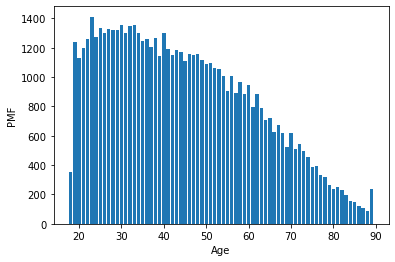

In [5]:
# Select the age column
age = gss['age']

# Make a PMF of age
pmf_age = Pmf.from_seq(age, normalize=False)

# Plot the PMF
pmf_age.bar()

# Label the axes
plt.xlabel('Age')
plt.ylabel('PMF')
plt.show()

# Cumulative distribution functions

CDF (Cumulative Distribution Function): The probability that you get a value <= x for a given value of x.

In [7]:
from empiricaldist import Cdf

### Make a CDF

In [18]:
# Select the age column
age = gss['age']

# Compute the CDF of age
cdf_age = Cdf.from_seq(age)

# Calculate the CDF of 30
print(cdf_age(30))

0.2539137136526389


### Compute IQR

IQR (Inter Quartile Range): The difference between the 75th and 25th percentiles. It is a measure of variability that is robust in the presence of errors or extreme values.

In [35]:
cdf_income = Cdf.from_seq(gss['realinc'])

print(cdf_income)

234.000000       0.000414
236.500000       0.000955
245.000000       0.001333
259.000000       0.001928
267.750000       0.002198
                   ...   
143778.000000    0.989297
144502.717140    0.993567
146153.668585    0.996180
155139.973100    0.999387
162607.000000    1.000000
Name: , Length: 597, dtype: float64


In [38]:
# Calculate the 75th percentile 
percentile_75th = cdf_income.inverse(0.75)

# Calculate the 25th percentile
percentile_25th = cdf_income.inverse(0.25)

# Calculate the interquartile range
iqr = percentile_75th - percentile_25th

# Print the interquartile range
print(iqr)

29676.0


### Plot a CDF

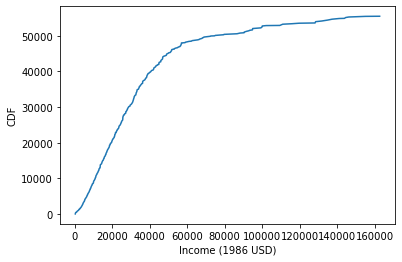

In [26]:
# Select realinc
income = gss['realinc']

# Make the CDF
cdf_income = Cdf.from_seq(income, normalize=False)

# Plot it
cdf_income.plot()

# Label the axes
plt.xlabel('Income (1986 USD)')
plt.ylabel('CDF')
plt.show()

# Comparing distributions

### Distribution of education

In [48]:
educ = gss['educ']
pmf_educ = Cdf.from_seq(educ)
pmf_educ

,probs
0.0,0.002311
1.0,0.002921
2.0,0.005345
3.0,0.009293
4.0,0.013948
5.0,0.020031
6.0,0.033545
7.0,0.047348
8.0,0.086206
9.0,0.117713


### Extract education levels

In [49]:
# Select educ
educ = gss['educ']

# Bachelor's degree
bach = (educ >= 16)

# Associate degree
assc = ((educ >= 14) & (educ < 16))

# High school (12 or fewer years of education)
high = (educ <= 12)
print(high.mean())

0.5308807991547402


### Plot income CDFs

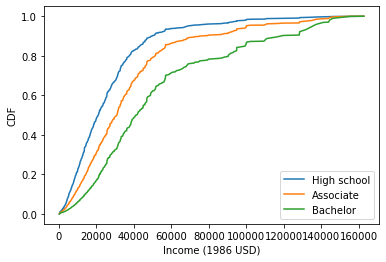

In [51]:
income = gss['realinc']

# Plot the CDFs
Cdf.from_seq(income[high]).plot(label='High school')
Cdf.from_seq(income[assc]).plot(label='Associate')
Cdf.from_seq(income[bach]).plot(label='Bachelor')

# Label the axes
plt.xlabel('Income (1986 USD)')
plt.ylabel('CDF')
plt.legend()
plt.show()

# Modeling distributions

### Distribution of income

In [52]:
# Extract realinc and compute its log
income = gss['realinc']
log_income = np.log10(income)

# Compute mean and standard deviation
mean = log_income.mean()
std = log_income.std()
print(mean, std)

# Make a norm object
from scipy.stats import norm
dist = norm(mean, std)

4.371148677933652 0.4290082383271419


### Comparing CDFs

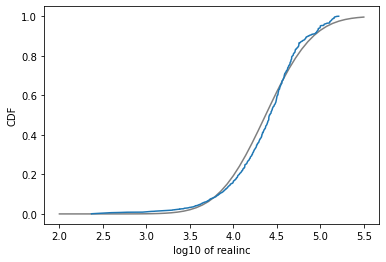

In [56]:
# Evaluate the model CDF
xs = np.linspace(2, 5.5)
ys = dist.cdf(xs)

# Plot the model CDF
plt.clf()
plt.plot(xs, ys, color='gray')

# Create and plot the Cdf of log_income
Cdf.from_seq(log_income).plot()
    
# Label the axes
plt.xlabel('log10 of realinc')
plt.ylabel('CDF')
plt.show()

### Comparing PDFs

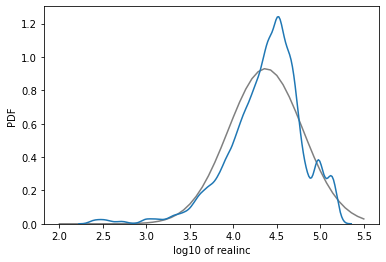

In [57]:
# Evaluate the normal PDF
xs = np.linspace(2, 5.5)
ys = dist.pdf(xs)

# Plot the model PDF
plt.clf()
plt.plot(xs, ys, color='gray')

# Plot the data KDE
sns.kdeplot(log_income)

# Label the axes
plt.xlabel('log10 of realinc')
plt.ylabel('PDF')
plt.show()